In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
import scipy.stats as stats

In [2]:
# Tempory data frame to pull in the drinks.csv file
temp_df = pd.read_csv("output_data/drinks.csv")

In [3]:
# Display head of data frame. Feel free to delete
temp_df.head()

,Drink ID,Name,Category,Alcoholic,Glass,Ingredients,Measure
0,17222,A1,Cocktail,True,cocktail glass,"['Gin', 'Grand Marnier', 'Lemon Juice', 'Grena...","['1 3/4 shot ', '1 Shot ', '1/4 Shot', '1/8 Sh..."
1,13501,ABC,Shot,True,shot glass,"['Amaretto', 'Baileys irish cream', 'Cognac']","['1/3 ', '1/3 ', '1/3 ']"
2,17225,Ace,Cocktail,True,martini glass,"['Gin', 'Grenadine', 'Heavy cream', 'Milk', 'E...","['2 shots ', '1/2 shot ', '1/2 shot ', '1/2 sh..."
3,17837,Adam,Ordinary Drink,True,cocktail glass,"['Dark rum', 'Lemon juice', 'Grenadine']","['2 oz ', '1 oz ', '1 tsp ']"
4,13938,AT&T,Ordinary Drink,True,highball glass,"['Absolut Vodka', 'Gin', 'Tonic water']","['1 oz ', '1 oz ', '4 oz ']"


In [4]:
# List conversion function. Let me know if there are any issues
def convert(s):
    lst = []
    temp = s.split(", ")
    
    for x in temp:
        lst.append(x.translate({ord(i): None for i in "[']"}))
    
    return lst

In [5]:
# Necessary copy of data frame. The value count is just a test. Feel free to delete that line
drink_df = temp_df.copy()

In [6]:
# Creation of main data frame. All plots should use this data (i.e. drink_df)
for i in range(0, len(drink_df)):
    drink_df.at[i,'Ingredients'] = convert(temp_df.loc[i,'Ingredients'])

In [7]:
# Creation of sorted list of tuples. Useful for most used ingredient
# ing_count = {}
# for i in range(0, len(drink_df)):
#     for ing in drink_df.loc[i,'Ingredients']:
#         if ing in ing_count:
#             ing_count[ing] = ing_count[ing] + 1
#         else:
#             ing_count[ing] = 1
            
# #print(ing_count)
# a=sorted(ing_count.items(), key=lambda x: x[1], reverse = True)
# print(a)
# #print(drink2_df['Ingredients'].to_string())

In [8]:
# Creation of new series. Feel free to delete if not needed.
drink_df['Ingredients Count'] = 0
for i in range(0, len(drink_df)):
    drink_df.loc[i,'Ingredients Count'] = len(drink_df.loc[i,'Ingredients'])
drink_df.head()

,Drink ID,Name,Category,Alcoholic,Glass,Ingredients,Measure,Ingredients Count
0,17222,A1,Cocktail,True,cocktail glass,"[Gin, Grand Marnier, Lemon Juice, Grenadine]","['1 3/4 shot ', '1 Shot ', '1/4 Shot', '1/8 Sh...",4
1,13501,ABC,Shot,True,shot glass,"[Amaretto, Baileys irish cream, Cognac]","['1/3 ', '1/3 ', '1/3 ']",3
2,17225,Ace,Cocktail,True,martini glass,"[Gin, Grenadine, Heavy cream, Milk, Egg White]","['2 shots ', '1/2 shot ', '1/2 shot ', '1/2 sh...",5
3,17837,Adam,Ordinary Drink,True,cocktail glass,"[Dark rum, Lemon juice, Grenadine]","['2 oz ', '1 oz ', '1 tsp ']",3
4,13938,AT&T,Ordinary Drink,True,highball glass,"[Absolut Vodka, Gin, Tonic water]","['1 oz ', '1 oz ', '4 oz ']",3


In [9]:
# split list into Alcoholic and Non-alcoholic data frames. Sort lists on Ingredients Count and reset index
drink_al_df = drink_df.loc[drink_df['Alcoholic'] == True].sort_values('Ingredients Count', ascending = False).reset_index(drop = True)
drink_non_df = drink_df.loc[drink_df['Alcoholic'] != True].sort_values('Ingredients Count', ascending = False).reset_index(drop = True)

In [10]:
print(f"Total alcoholic cocktails = {len(drink_al_df)}.")
drink_al_df.head()

Total alcoholic cocktails = 355.


,Drink ID,Name,Category,Alcoholic,Glass,Ingredients,Measure,Ingredients Count
0,12910,Egg Nog #4,Punch / Party Drink,True,punch bowl,"[Egg yolk, Sugar, Milk, Light rum, Bourbon, Va...","['6 ', '1/4 cup ', '2 cups ', '1/2 cup ', '1/2...",11
1,13024,Sweet Sangria,Punch / Party Drink,True,pitcher,"[Red wine, Sugar, Water, Apple, Orange, Lime, ...","['2 bottles ', '1 cup ', '2 cups hot ', '1 cup...",8
2,15395,1-900-FUK-MEUP,Shot,True,old-fashioned glass,"[Absolut Kurant, Grand Marnier, Chambord raspb...","['1/2 oz ', '1/4 oz ', '1/4 oz ', '1/4 oz ', '...",8
3,12916,Egg Nog - Healthy,Punch / Party Drink,True,collins glass,"[Egg, Sugar, Condensed milk, Milk, Vanilla ext...","['1/2 cup ', '3 tblsp ', '13 oz skimmed ', '3/...",7
4,178322,Spice 75,Cocktail,True,wine glass,"[Sugar, Allspice, Rum, Lime Juice, Champagne, ...","['60 ml', '1 tblsp', '20 cl', '90 ml', '6 cl',...",7


In [11]:
print(f"Total non-alcoholic cocktails = {len(drink_non_df)}.")
drink_non_df.head()

Total non-alcoholic cocktails = 31.


,Drink ID,Name,Category,Alcoholic,Glass,Ingredients,Measure,Ingredients Count
0,12774,Masala Chai,Coffee / Tea,False,coffee mug,"[Water, Tea, Ginger, Cardamom, Cloves, Cinnamo...","['2 cups ', '3-4 tsp ', '1 chunk dried ', '3-4...",9
1,12670,Fruit Cooler,Other/Unknown,False,highball glass,"[Apple juice, Strawberries, Sugar, Lemon, Appl...","['1 can frozen ', '1 cup ', '2 tblsp ', '1 ', ...",7
2,12782,Thai Coffee,Coffee / Tea,False,highball glass,"[Coffee, Coriander, Cardamom, Sugar, Whipping ...","['6 tblsp ground', '1/4 tsp ', '4-5 whole gree...",6
3,12786,Thai Iced Tea,Coffee / Tea,False,highball glass,"[Tea, Water, Condensed milk, Ice, Mint]","['1/4 cup Thai ', '1/2 cup boiling ', '2 tsp s...",5
4,12748,Orange Scented Hot Chocolate,Cocoa,False,coffee mug,"[Milk, Chocolate, Orange peel, Espresso, Nutmeg]","['2 cups ', '4 oz chopped bittersweet or semi-...",5


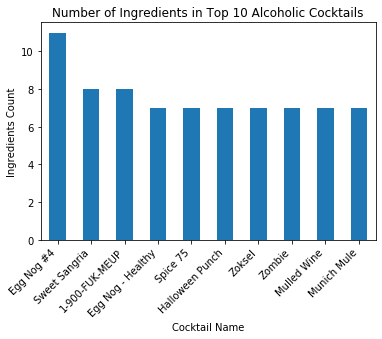

In [19]:
drink_al_df.loc[0:9,:].plot("Name","Ingredients Count", kind = 'bar', legend = False, title = "Number of Ingredients in Top 10 Alcoholic Cocktails")
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel("Cocktail Name")
plt.ylabel("Ingredients Count")
plt.savefig('output_data/Ingredients_Count_Alcohol.png', bbox_inches="tight")
plt.show()

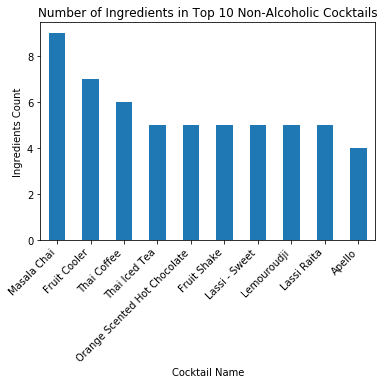

In [18]:
drink_non_df.loc[0:9,:].plot("Name","Ingredients Count", kind = 'bar', legend = False, title = "Number of Ingredients in Top 10 Non-Alcoholic Cocktails")
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel("Cocktail Name")
plt.ylabel("Ingredients Count")
plt.savefig('output_data/Ingredients_Count_NonAlcohol.png', bbox_inches="tight")
plt.show()

In [14]:
# Create dataframe to do statistics on

complex_df = drink_al_df[["Alcoholic", "Ingredients Count"]]
complex_df = complex_df.append(drink_non_df[["Alcoholic", "Ingredients Count"]], ignore_index=True)
complex_df.replace({True: "Alcoholic", False: "Non-alcoholic"}, inplace=True)
complex_df

,Alcoholic,Ingredients Count
0,Alcoholic,11
1,Alcoholic,8
2,Alcoholic,8
3,Alcoholic,7
4,Alcoholic,7
...,...,...
381,Non-alcoholic,3
382,Non-alcoholic,3
383,Non-alcoholic,2
384,Non-alcoholic,2


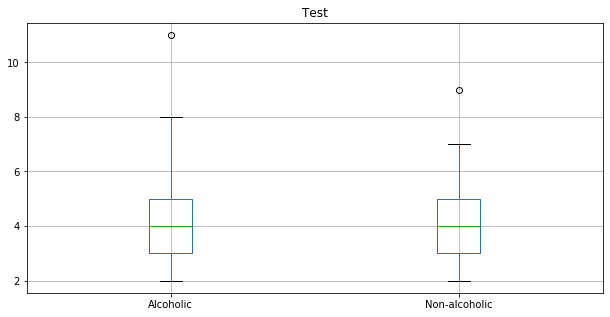

In [24]:
# Create the boxplot to see any statistically significant difference

complex_df.boxplot("Ingredients Count", by="Alcoholic", figsize=(10, 5))
plt.xlabel("")
plt.suptitle('')
plt.title("Statistical Means of Ingredients Count")
plt.savefig('output_data/Box_Plot_AverageIng.png', bbox_inches="tight")
plt.show()

In [16]:
# Extract groups and perform ANOVA
group1 = complex_df[complex_df["Alcoholic"] == "Alcoholic"]["Ingredients Count"]
group2 = complex_df[complex_df["Alcoholic"] == "Non-alcoholic"]["Ingredients Count"]

stats.f_oneway(group1, group2)

F_onewayResult(statistic=0.3399890998800719, pvalue=0.560177780667217)

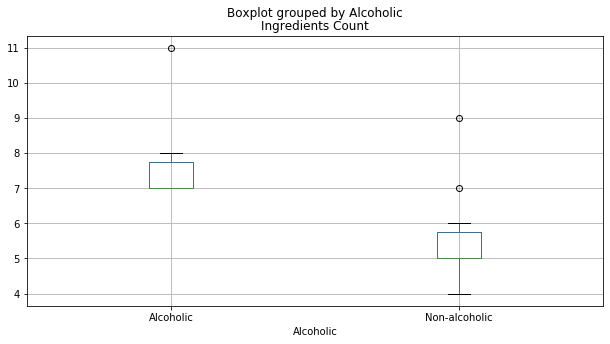

F_onewayResult(statistic=10.97560975609756, pvalue=0.003869121134391894)

In [17]:
# Restrict to the top 10 from both lists
complex2_df = drink_al_df.loc[0:9,:][["Alcoholic", "Ingredients Count"]]
complex2_df = complex2_df.append(drink_non_df.loc[0:9,:][["Alcoholic", "Ingredients Count"]], ignore_index=True)
complex2_df.replace({True: "Alcoholic", False: "Non-alcoholic"}, inplace=True)

complex2_df.boxplot("Ingredients Count", by="Alcoholic", figsize=(10, 5))
plt.suptitle('')
plt.title("Statistical Means of Ingredients Count")
plt.savefig('output_data/Box_Plot_AverageIngTop10.png', bbox_inches="tight")
plt.show()

group1 = complex2_df[complex2_df["Alcoholic"] == "Alcoholic"]["Ingredients Count"]
group2 = complex2_df[complex2_df["Alcoholic"] == "Non-alcoholic"]["Ingredients Count"]

stats.f_oneway(group1, group2)